In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import h5py
import numpy as np

import constants as cst

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [42]:
def ad(p_para, traj, mu=None):
    # Calculate bounce points
    sign_changes = np.sign(np.array(p_para)[1:]) - np.sign(np.array(p_para)[:-1])
    bounce = list(np.where(sign_changes == 2)[0]+int(1))

    # Calculate second adiabatic invariant
    ad2 = [sum(np.abs(p_para[bounce[i]:bounce[i + 1]])) for i in range(len(bounce) - 1)]

    # Calculate third adiabatic invariant
    rmag = np.linalg.norm(traj, axis=1)
    lambda_l = np.arcsin(traj[:, 2] / rmag)
    lstar = rmag / (cst.R_e * np.cos(lambda_l)**2)
    ad3 = 1.953e-4 * cst.R_e**2 / lstar

    return np.array(ad2), ad3

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

In [6]:
# Load results from HDF5 files for proton
with h5py.File('pr_pusher.h5', 'r') as hf:
    time_boris_pr = hf['boris']['time'][:]
    traj_boris_pr = hf['boris']['traj'][:]
    gamma_boris_pr = hf['boris']['gamma'][:]
    mu_boris_pr = hf['boris']['mu'][:]
    p_para_boris_pr = hf['boris']['p_para'][:]

    time_hc_pr = hf['hc']['time'][:]
    traj_hc_pr = hf['hc']['traj'][:]
    gamma_hc_pr = hf['hc']['gamma'][:]
    mu_hc_pr = hf['hc']['mu'][:]
    p_para_hc_pr = hf['hc']['p_para'][:]

    time_rk4_pr = hf['rk4']['time'][:]
    traj_rk4_pr = hf['rk4']['traj'][:]
    gamma_rk4_pr = hf['rk4']['gamma'][:]
    mu_rk4_pr = hf['rk4']['mu'][:]
    p_para_rk4_pr = hf['rk4']['p_para'][:]

    time_rk8_pr = hf['rk8']['time'][:]
    traj_rk8_pr = hf['rk8']['traj'][:]
    gamma_rk8_pr = hf['rk8']['gamma'][:]
    mu_rk8_pr = hf['rk8']['mu'][:]
    p_para_rk8_pr = hf['rk8']['p_para'][:]

    time_gca_pr = hf['gca']['time'][:]
    traj_gca_pr = hf['gca']['traj'][:]
    gamma_gca_pr = hf['gca']['gamma'][:]
    mu_gca_pr = hf['gca']['mu'][:]
    p_para_gca_pr = hf['gca']['p_para'][:]


In [7]:
j_rk4_pr, phi_rk4_pr = ad(p_para_rk4_pr, traj_rk4_pr, mu_rk4_pr)
j_rk8_pr, phi_rk8_pr = ad(p_para_rk8_pr, traj_rk8_pr, mu_rk8_pr)
j_hc_pr, phi_hc_pr = ad(p_para_hc_pr, traj_hc_pr, mu_hc_pr)
j_boris_pr, phi_boris_pr = ad(p_para_boris_pr, traj_boris_pr, mu_boris_pr)
j_gca_pr, phi_gca_pr = ad(p_para_gca_pr, traj_gca_pr)

In [8]:
window_size_pr = 15000
first_moving_mu_rk4_pr = moving_average(mu_rk4_pr, window_size_pr)
first_moving_mu_rk8_pr = moving_average(mu_rk8_pr, window_size_pr)
first_moving_mu_boris_pr = moving_average(mu_boris_pr, window_size_pr)
first_moving_mu_hc_pr = moving_average(mu_hc_pr, window_size_pr)

second_moving_mu_rk4_pr = moving_average(first_moving_mu_rk4_pr, window_size_pr)
second_moving_mu_rk8_pr = moving_average(first_moving_mu_rk8_pr, window_size_pr)
second_moving_mu_boris_pr = moving_average(first_moving_mu_boris_pr, window_size_pr)
second_moving_mu_hc_pr = moving_average(first_moving_mu_hc_pr, window_size_pr)

erro_mu_boris_pr = np.abs(second_moving_mu_boris_pr-second_moving_mu_boris_pr[0])/second_moving_mu_boris_pr[0]
erro_mu_rk4_pr = np.abs(second_moving_mu_rk4_pr-second_moving_mu_rk4_pr[0])/second_moving_mu_rk4_pr[0]
erro_mu_rk8_pr = np.abs(second_moving_mu_rk8_pr-second_moving_mu_rk8_pr[0])/second_moving_mu_rk8_pr[0]
erro_mu_hc_pr = np.abs(second_moving_mu_hc_pr-second_moving_mu_hc_pr[0])/second_moving_mu_hc_pr[0]

erro_j_gca_pr = np.abs(j_gca_pr-j_gca_pr[0])/j_gca_pr[0]
erro_j_boris_pr = np.abs(j_boris_pr-j_boris_pr[0])/j_boris_pr[0]
erro_j_rk4_pr = np.abs(j_rk4_pr-j_rk4_pr[0])/j_rk4_pr[0]
erro_j_rk8_pr = np.abs(j_rk8_pr-j_rk8_pr[0])/j_rk8_pr[0]
erro_j_hc_pr = np.abs(j_hc_pr-j_hc_pr[0])/j_hc_pr[0]


first_moving_phi_rk4_pr = moving_average(phi_rk4_pr, window_size_pr)
first_moving_phi_rk8_pr = moving_average(phi_rk8_pr, window_size_pr)
first_moving_phi_boris_pr = moving_average(phi_boris_pr, window_size_pr)
first_moving_phi_hc_pr = moving_average(phi_hc_pr, window_size_pr)
first_moving_phi_gca_pr = moving_average(phi_gca_pr, 1500)

second_moving_phi_rk4_pr = moving_average(first_moving_phi_rk4_pr, window_size_pr)
second_moving_phi_rk8_pr = moving_average(first_moving_phi_rk8_pr, window_size_pr)
second_moving_phi_boris_pr = moving_average(first_moving_phi_boris_pr, window_size_pr)
second_moving_phi_hc_pr = moving_average(first_moving_phi_hc_pr, window_size_pr)
second_moving_phi_gca_pr = moving_average(first_moving_phi_gca_pr, 1500)

erro_phi_boris_pr = np.abs(second_moving_phi_boris_pr-second_moving_phi_boris_pr[0])/abs(second_moving_phi_boris_pr[0])
erro_phi_rk4_pr = np.abs(second_moving_phi_rk4_pr-second_moving_phi_rk4_pr[0])/abs(second_moving_phi_rk4_pr[0])
erro_phi_rk8_pr = np.abs(second_moving_phi_rk8_pr-second_moving_phi_rk8_pr[0])/abs(second_moving_phi_rk8_pr[0])
erro_phi_hc_pr = np.abs(second_moving_phi_hc_pr-second_moving_phi_hc_pr[0])/abs(second_moving_phi_hc_pr[0])
erro_phi_gca_pr = np.abs(second_moving_phi_gca_pr-second_moving_phi_gca_pr[0])/np.abs(second_moving_phi_gca_pr[0])


erro_gamma_gca_pr = np.abs(gamma_gca_pr-gamma_gca_pr[0])/gamma_gca_pr[0]
erro_gamma_boris_pr = np.abs(gamma_boris_pr-gamma_boris_pr[0])/gamma_boris_pr[0]
erro_gamma_rk4_pr = np.abs(gamma_rk4_pr-gamma_rk4_pr[0])/gamma_rk4_pr[0]
erro_gamma_rk8_pr = np.abs(gamma_rk8_pr-gamma_rk8_pr[0])/gamma_rk8_pr[0]
erro_gamma_hc_pr = np.abs(gamma_hc_pr-gamma_hc_pr[0])/gamma_hc_pr[0]


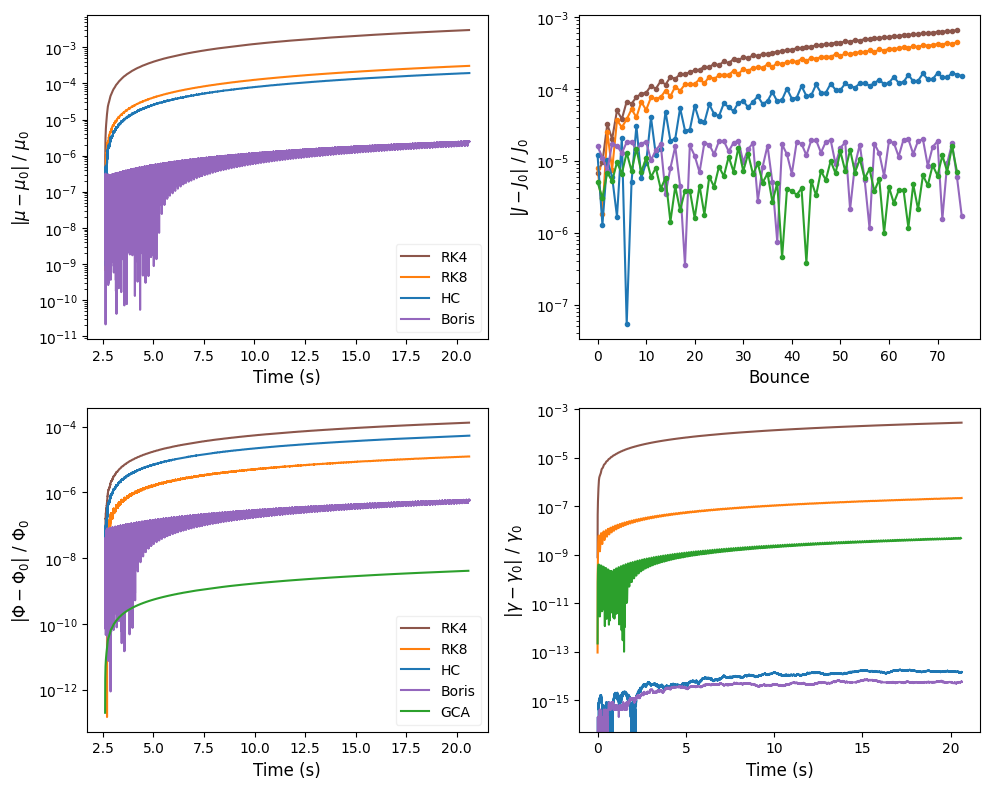

In [9]:
fig = plt.figure(figsize=(10, 8), dpi=100)

ax1 = fig.add_subplot(2, 2, 1)  # First row, first column
ax1.plot(time_rk4_pr[window_size_pr-1:][window_size_pr:], erro_mu_rk4_pr[1:], '-', label='RK4', color=colors[5])
ax1.plot(time_rk8_pr[window_size_pr-1:][window_size_pr:], erro_mu_rk8_pr[1:], '-', label='RK8', color=colors[1])
ax1.plot(time_hc_pr[window_size_pr-1:][window_size_pr:], erro_mu_hc_pr[1:], '-', label='HC', color=colors[0])
ax1.plot(time_boris_pr[window_size_pr-1:][window_size_pr:], erro_mu_boris_pr[1:], '-', label='Boris', color=colors[4])
ax1.set_ylabel(r'$|\mu-\mu_0|$ / $\mu_0$', fontsize=12)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.legend(fontsize=10,framealpha=0.3)
ax1.set_yscale('log')

ax2 = fig.add_subplot(2, 2, 2)  # First row, second column
ax2.plot(erro_j_rk4_pr[1:], '.-', label='RK4', color=colors[5])
ax2.plot(erro_j_rk8_pr[1:], '.-', label='RK8', color=colors[1])
ax2.plot(erro_j_hc_pr[1:], '.-', label='HC', color=colors[0])
ax2.plot(erro_j_boris_pr[1:], '.-', label='Boris', color=colors[4])
ax2.plot(erro_j_gca_pr[1:], '.-', label='GCA', color=colors[2])
ax2.set_ylabel(r'$|J-J_0|$ / $J_0$', fontsize=12)
ax2.set_xlabel('Bounce', fontsize=12)
# ax2.legend(fontsize=10,framealpha=0.3)
ax2.set_yscale('log')

ax3 = fig.add_subplot(2, 2, 3)  # Second row, first column
ax3.plot(time_rk4_pr[window_size_pr-1:][window_size_pr:], erro_phi_rk4_pr[1:], '-', label='RK4', color=colors[5])
ax3.plot(time_rk8_pr[window_size_pr-1:][window_size_pr:], erro_phi_rk8_pr[1:], '-', label='RK8', color=colors[1])
ax3.plot(time_hc_pr[window_size_pr-1:][window_size_pr:], erro_phi_hc_pr[1:], '-', label='HC', color=colors[0])
ax3.plot(time_boris_pr[window_size_pr-1:][window_size_pr:], erro_phi_boris_pr[1:], '-', label='Boris', color=colors[4])
ax3.plot(time_gca_pr[1500-1:][1500:], erro_phi_gca_pr[1:], '-', label='GCA', color=colors[2])
ax3.set_ylabel(r'$|\Phi-\Phi_0|$ / $\Phi_0$', fontsize=12)
ax3.set_xlabel('Time (s)', fontsize=12)
ax3.legend(fontsize=10,framealpha=0.3)
ax3.set_yscale('log')

ax4 = fig.add_subplot(2, 2, 4)  # Second row, second column
ax4.plot(time_rk4_pr[1:], erro_gamma_rk4_pr[1:], '-', label='RK4', color=colors[5])
ax4.plot(time_rk8_pr[1:], erro_gamma_rk8_pr[1:], '-', label='RK8', color=colors[1])
ax4.plot(time_hc_pr[1:], erro_gamma_hc_pr[1:], '-', label='HC', color=colors[0])
ax4.plot(time_boris_pr[1:], erro_gamma_boris_pr[1:], '-', label='Boris', color=colors[4])
ax4.plot(time_gca_pr[1:], erro_gamma_gca_pr[1:], '-', label='GCA', color=colors[2])
ax4.set_ylabel(r'$|\gamma-\gamma_0|$ / $\gamma_0$', fontsize=12)
ax4.set_xlabel('Time (s)', fontsize=12)
ax4.set_yscale('log')

plt.tight_layout()

# plt.savefig('pr_pusher.pdf', format='pdf', dpi=300)

plt.show()

In [11]:
# Load results from HDF5 files for electron
with h5py.File('el_pusher.h5', 'r') as hf:
    time_boris_el = hf['boris']['time'][:]
    traj_boris_el = hf['boris']['traj'][:]
    gamma_boris_el = hf['boris']['gamma'][:]
    mu_boris_el = hf['boris']['mu'][:]
    p_para_boris_el = hf['boris']['p_para'][:]

    time_hc_el = hf['hc']['time'][:]
    traj_hc_el = hf['hc']['traj'][:]
    gamma_hc_el = hf['hc']['gamma'][:]
    mu_hc_el = hf['hc']['mu'][:]
    p_para_hc_el = hf['hc']['p_para'][:]

    time_rk4_el = hf['rk4']['time'][:]
    traj_rk4_el = hf['rk4']['traj'][:]
    gamma_rk4_el = hf['rk4']['gamma'][:]
    mu_rk4_el = hf['rk4']['mu'][:]
    p_para_rk4_el = hf['rk4']['p_para'][:]

    time_rk8_el = hf['rk8']['time'][:]
    traj_rk8_el = hf['rk8']['traj'][:]
    gamma_rk8_el = hf['rk8']['gamma'][:]
    mu_rk8_el = hf['rk8']['mu'][:]
    p_para_rk8_el = hf['rk8']['p_para'][:]

    time_gca_el = hf['gca']['time'][:]
    traj_gca_el = hf['gca']['traj'][:]
    gamma_gca_el = hf['gca']['gamma'][:]
    mu_gca_el = hf['gca']['mu'][:]
    p_para_gca_el = hf['gca']['p_para'][:]


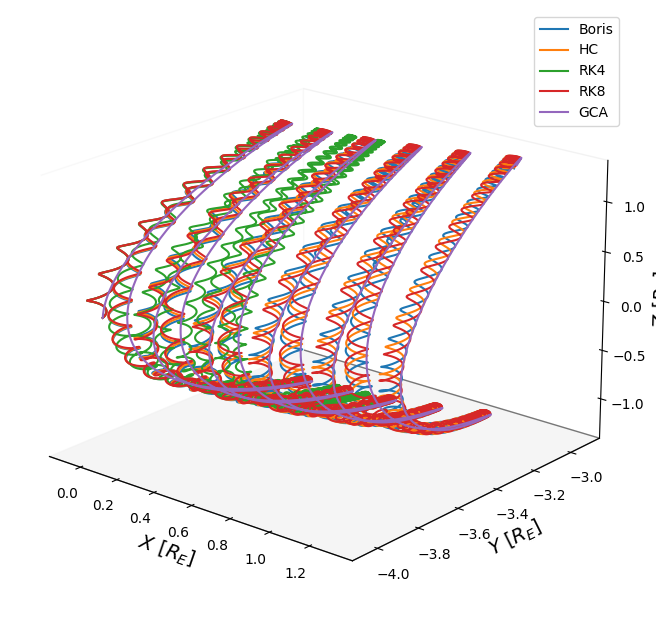

In [12]:
fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, projection='3d')

ax.plot(traj_boris_el[:20000, 0]/cst.R_e, traj_boris_el[:20000, 1]/cst.R_e, traj_boris_el[:20000, 2]/cst.R_e, label='Boris')
ax.plot(traj_hc_el[:20000, 0]/cst.R_e, traj_hc_el[:20000, 1]/cst.R_e, traj_hc_el[:20000, 2]/cst.R_e, label='HC')
ax.plot(traj_rk4_el[:20000, 0]/cst.R_e, traj_rk4_el[:20000, 1]/cst.R_e, traj_rk4_el[:20000, 2]/cst.R_e, label='RK4')
ax.plot(traj_rk8_el[:20000, 0]/cst.R_e, traj_rk8_el[:20000, 1]/cst.R_e, traj_rk8_el[:20000, 2]/cst.R_e, label='RK8')
ax.plot(traj_gca_el[:2000, 0]/cst.R_e, traj_gca_el[:2000, 1]/cst.R_e, traj_gca_el[:2000, 2]/cst.R_e, label='GCA')

ax.set_xlabel(r'$X \ [R_{E}]$', fontsize=14)
ax.set_ylabel(r'$Y \ [R_{E}]$', fontsize=14)
ax.set_zlabel(r'$Z \ [R_{E}]$', fontsize=14)

ax.xaxis.pane.fill = False  # Disable the background pane on the x-axis
ax.yaxis.pane.fill = False  # Disable the background pane on the y-axis
ax.zaxis.pane.set_edgecolor('black')  # Set the edge color of the bottom plane
ax.view_init(elev=20, azim=-50)

ax.grid(False)

plt.legend()
# plt.savefig('el_traj.pdf', format='pdf', dpi=300)
plt.show()

In [13]:
j_rk4_el, phi_rk4_el = ad(p_para_rk4_el, traj_rk4_el, mu_rk4_el)
j_rk8_el, phi_rk8_el = ad(p_para_rk8_el, traj_rk8_el, mu_rk8_el)
j_hc_el, phi_hc_el = ad(p_para_hc_el, traj_hc_el, mu_hc_el)
j_boris_el, phi_boris_el = ad(p_para_boris_el, traj_boris_el, mu_boris_el)
j_gca_el, phi_gca_el = ad(p_para_gca_el, traj_gca_el)

In [14]:
window_size_el = 15000
first_moving_mu_rk4_el = moving_average(mu_rk4_el, window_size_el)
first_moving_mu_rk8_el = moving_average(mu_rk8_el, window_size_el)
first_moving_mu_boris_el = moving_average(mu_boris_el, window_size_el)
first_moving_mu_hc_el = moving_average(mu_hc_el, window_size_el)

second_moving_mu_rk4_el = moving_average(first_moving_mu_rk4_el, window_size_el)
second_moving_mu_rk8_el = moving_average(first_moving_mu_rk8_el, window_size_el)
second_moving_mu_boris_el = moving_average(first_moving_mu_boris_el, window_size_el)
second_moving_mu_hc_el = moving_average(first_moving_mu_hc_el, window_size_el)

erro_mu_boris_el = np.abs(second_moving_mu_boris_el-second_moving_mu_boris_el[0])/second_moving_mu_boris_el[0]
erro_mu_rk4_el = np.abs(second_moving_mu_rk4_el-second_moving_mu_rk4_el[0])/second_moving_mu_rk4_el[0]
erro_mu_rk8_el = np.abs(second_moving_mu_rk8_el-second_moving_mu_rk8_el[0])/second_moving_mu_rk8_el[0]
erro_mu_hc_el = np.abs(second_moving_mu_hc_el-second_moving_mu_hc_el[0])/second_moving_mu_hc_el[0]

erro_j_gca_el = np.abs(j_gca_el-j_gca_el[0])/j_gca_el[0]
erro_j_boris_el = np.abs(j_boris_el-j_boris_el[0])/j_boris_el[0]
erro_j_rk4_el = np.abs(j_rk4_el-j_rk4_el[0])/j_rk4_el[0]
erro_j_rk8_el = np.abs(j_rk8_el-j_rk8_el[0])/j_rk8_el[0]
erro_j_hc_el = np.abs(j_hc_el-j_hc_el[0])/j_hc_el[0]


first_moving_phi_rk4_el = moving_average(phi_rk4_el, window_size_el)
first_moving_phi_rk8_el = moving_average(phi_rk8_el, window_size_el)
first_moving_phi_boris_el = moving_average(phi_boris_el, window_size_el)
first_moving_phi_hc_el = moving_average(phi_hc_el, window_size_el)
first_moving_phi_gca_el = moving_average(phi_gca_el, 1500)

second_moving_phi_rk4_el = moving_average(first_moving_phi_rk4_el, window_size_el)
second_moving_phi_rk8_el = moving_average(first_moving_phi_rk8_el, window_size_el)
second_moving_phi_boris_el = moving_average(first_moving_phi_boris_el, window_size_el)
second_moving_phi_hc_el = moving_average(first_moving_phi_hc_el, window_size_el)
second_moving_phi_gca_el = moving_average(first_moving_phi_gca_el, 1500)

erro_phi_boris_el = np.abs(second_moving_phi_boris_el-second_moving_phi_boris_el[0])/abs(second_moving_phi_boris_el[0])
erro_phi_rk4_el = np.abs(second_moving_phi_rk4_el-second_moving_phi_rk4_el[0])/abs(second_moving_phi_rk4_el[0])
erro_phi_rk8_el = np.abs(second_moving_phi_rk8_el-second_moving_phi_rk8_el[0])/abs(second_moving_phi_rk8_el[0])
erro_phi_hc_el = np.abs(second_moving_phi_hc_el-second_moving_phi_hc_el[0])/abs(second_moving_phi_hc_el[0])
erro_phi_gca_el = np.abs(second_moving_phi_gca_el-second_moving_phi_gca_el[0])/np.abs(second_moving_phi_gca_el[0])


erro_gamma_gca_el = np.abs(gamma_gca_el-gamma_gca_el[0])/gamma_gca_el[0]
erro_gamma_boris_el = np.abs(gamma_boris_el-gamma_boris_el[0])/gamma_boris_el[0]
erro_gamma_rk4_el = np.abs(gamma_rk4_el-gamma_rk4_el[0])/gamma_rk4_el[0]
erro_gamma_rk8_el = np.abs(gamma_rk8_el-gamma_rk8_el[0])/gamma_rk8_el[0]
erro_gamma_hc_el = np.abs(gamma_hc_el-gamma_hc_el[0])/gamma_hc_el[0]


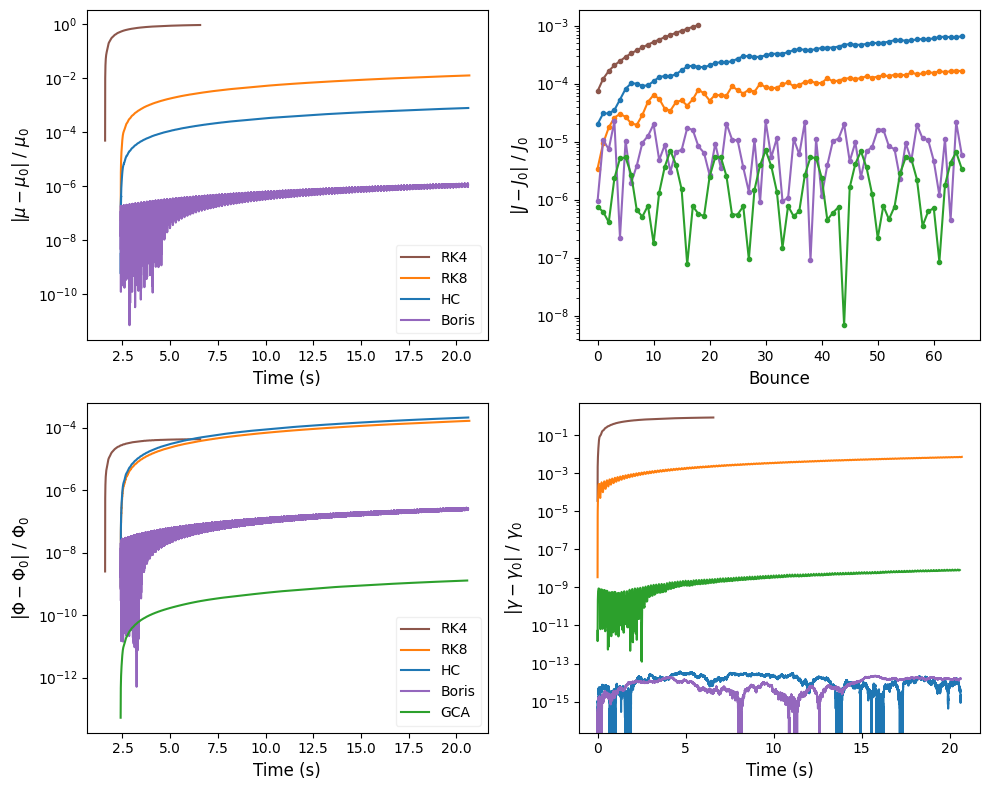

In [15]:
fig = plt.figure(figsize=(10, 8), dpi=100)

ax1 = fig.add_subplot(2, 2, 1)  # First row, first column
ax1.plot(time_rk4_el[window_size_el-1:][window_size_el:], erro_mu_rk4_el[1:], '-', label='RK4', color=colors[5])
ax1.plot(time_rk8_el[window_size_el-1:][window_size_el:], erro_mu_rk8_el[1:], '-', label='RK8', color=colors[1])
ax1.plot(time_hc_el[window_size_el-1:][window_size_el:], erro_mu_hc_el[1:], '-', label='HC', color=colors[0])
ax1.plot(time_boris_el[window_size_el-1:][window_size_el:], erro_mu_boris_el[1:], '-', label='Boris', color=colors[4])
ax1.set_ylabel(r'$|\mu-\mu_0|$ / $\mu_0$', fontsize=12)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.legend(fontsize=10,framealpha=0.3)
ax1.set_yscale('log')

ax2 = fig.add_subplot(2, 2, 2)  # First row, second column
ax2.plot(erro_j_rk4_el[1:], '.-', label='RK4', color=colors[5])
ax2.plot(erro_j_rk8_el[1:], '.-', label='RK8', color=colors[1])
ax2.plot(erro_j_hc_el[1:], '.-', label='HC', color=colors[0])
ax2.plot(erro_j_boris_el[1:], '.-', label='Boris', color=colors[4])
ax2.plot(erro_j_gca_el[1:], '.-', label='GCA', color=colors[2])
ax2.set_ylabel(r'$|J-J_0|$ / $J_0$', fontsize=12)
ax2.set_xlabel('Bounce', fontsize=12)
# ax2.legend(fontsize=10,framealpha=0.3)
ax2.set_yscale('log')

ax3 = fig.add_subplot(2, 2, 3)  # Second row, first column
ax3.plot(time_rk4_el[window_size_el-1:][window_size_el:], erro_phi_rk4_el[1:], '-', label='RK4', color=colors[5])
ax3.plot(time_rk8_el[window_size_el-1:][window_size_el:], erro_phi_rk8_el[1:], '-', label='RK8', color=colors[1])
ax3.plot(time_hc_el[window_size_el-1:][window_size_el:], erro_phi_hc_el[1:], '-', label='HC', color=colors[0])
ax3.plot(time_boris_el[window_size_el-1:][window_size_el:], erro_phi_boris_el[1:], '-', label='Boris', color=colors[4])
ax3.plot(time_gca_el[1500-1:][1500:], erro_phi_gca_el[1:], '-', label='GCA', color=colors[2])
ax3.set_ylabel(r'$|\Phi-\Phi_0|$ / $\Phi_0$', fontsize=12)
ax3.set_xlabel('Time (s)', fontsize=12)
ax3.legend(fontsize=10,framealpha=0.3)
ax3.set_yscale('log')

ax4 = fig.add_subplot(2, 2, 4)  # Second row, second column
ax4.plot(time_rk4_el[1:], erro_gamma_rk4_el[1:], '-', label='RK4', color=colors[5])
ax4.plot(time_rk8_el[1:], erro_gamma_rk8_el[1:], '-', label='RK8', color=colors[1])
ax4.plot(time_hc_el[1:], erro_gamma_hc_el[1:], '-', label='HC', color=colors[0])
ax4.plot(time_boris_el[1:], erro_gamma_boris_el[1:], '-', label='Boris', color=colors[4])
ax4.plot(time_gca_el[1:], erro_gamma_gca_el[1:], '-', label='GCA', color=colors[2])
ax4.set_ylabel(r'$|\gamma-\gamma_0|$ / $\gamma_0$', fontsize=12)
ax4.set_xlabel('Time (s)', fontsize=12)
ax4.set_yscale('log')

plt.tight_layout()

# plt.savefig('el_pusher.pdf', format='pdf', dpi=300)

plt.show()

In [16]:
# Load results from HDF5 files for proton
with h5py.File('el_grid.h5', 'r') as hf:
    time_ana = hf['ana']['time'][:]
    traj_ana = hf['ana']['traj'][:]
    gamma_ana = hf['ana']['gamma'][:]
    mu_ana = hf['ana']['mu'][:]
    p_para_ana = hf['ana']['p_para'][:]

    time_tri = hf['tri']['time'][:]
    traj_tri = hf['tri']['traj'][:]
    gamma_tri = hf['tri']['gamma'][:]
    mu_tri = hf['tri']['mu'][:]
    p_para_tri = hf['tri']['p_para'][:]

    time_tsc = hf['tsc']['time'][:]
    traj_tsc = hf['tsc']['traj'][:]
    gamma_tsc = hf['tsc']['gamma'][:]
    mu_tsc = hf['tsc']['mu'][:]
    p_para_tsc = hf['tsc']['p_para'][:]

    time_bsp = hf['bsp']['time'][:]
    traj_bsp = hf['bsp']['traj'][:]
    gamma_bsp = hf['bsp']['gamma'][:]
    mu_bsp = hf['bsp']['mu'][:]
    p_para_bsp = hf['bsp']['p_para'][:]



In [43]:
j_ana, phi_ana = ad(p_para_ana, traj_ana, mu_ana)
j_tri, phi_tri = ad(p_para_tri, traj_tri, mu_tri)
j_tsc, phi_tsc= ad(p_para_tsc, traj_tsc, mu_tsc)
j_bsp, phi_bsp = ad(p_para_bsp, traj_bsp, mu_bsp)

In [52]:
window_size_el = 15000
first_moving_mu_ana = moving_average(mu_ana, window_size_el)
first_moving_mu_tri = moving_average(mu_tri, window_size_el)
first_moving_mu_tsc = moving_average(mu_tsc, window_size_el)
first_moving_mu_bsp = moving_average(mu_bsp, window_size_el)

second_moving_mu_ana = moving_average(first_moving_mu_ana, window_size_el)
second_moving_mu_tri = moving_average(first_moving_mu_tri, window_size_el)
second_moving_mu_tsc = moving_average(first_moving_mu_tsc, window_size_el)
second_moving_mu_bsp = moving_average(first_moving_mu_bsp, window_size_el)

erro_mu_tsc = np.abs(second_moving_mu_tsc-second_moving_mu_ana)/second_moving_mu_ana
erro_mu_bsp = np.abs(second_moving_mu_bsp-second_moving_mu_ana[:len(second_moving_mu_bsp)])/second_moving_mu_ana[:len(second_moving_mu_bsp)]
erro_mu_tri = np.abs(second_moving_mu_tri-second_moving_mu_ana)/second_moving_mu_ana

erro_j_tri = np.abs(j_tri-j_ana[:len(j_tri)])/j_ana[:len(j_tri)]
erro_j_tsc = np.abs(j_tsc-j_ana)/j_ana
erro_j_bsp = np.abs(j_bsp-j_ana)/j_ana


first_moving_phi_ana = moving_average(phi_ana, window_size_el)
first_moving_phi_tri = moving_average(phi_tri, window_size_el)
first_moving_phi_tsc = moving_average(phi_tsc, window_size_el)
first_moving_phi_bsp = moving_average(phi_bsp, window_size_el)

second_moving_phi_ana = moving_average(first_moving_phi_ana, window_size_el)
second_moving_phi_tri = moving_average(first_moving_phi_tri, window_size_el)
second_moving_phi_tsc = moving_average(first_moving_phi_tsc, window_size_el)
second_moving_phi_bsp = moving_average(first_moving_phi_bsp, window_size_el)

erro_phi_tsc = np.abs(second_moving_phi_tsc-second_moving_phi_ana)/second_moving_phi_ana
erro_phi_bsp = np.abs(second_moving_phi_bsp-second_moving_phi_ana[:len(second_moving_phi_bsp)])/second_moving_phi_ana[:len(second_moving_phi_bsp)]
erro_phi_tri = np.abs(second_moving_phi_tri-second_moving_phi_ana)/second_moving_phi_ana


# erro_gamma_tri = np.abs(gamma_tri-gamma_ana[0])/gamma_ana[0]
# erro_gamma_tsc = np.abs(gamma_tsc-gamma_ana[0])/gamma_ana[0]
# erro_gamma_bsp = np.abs(gamma_bsp-gamma_ana[0])/gamma_ana[0]


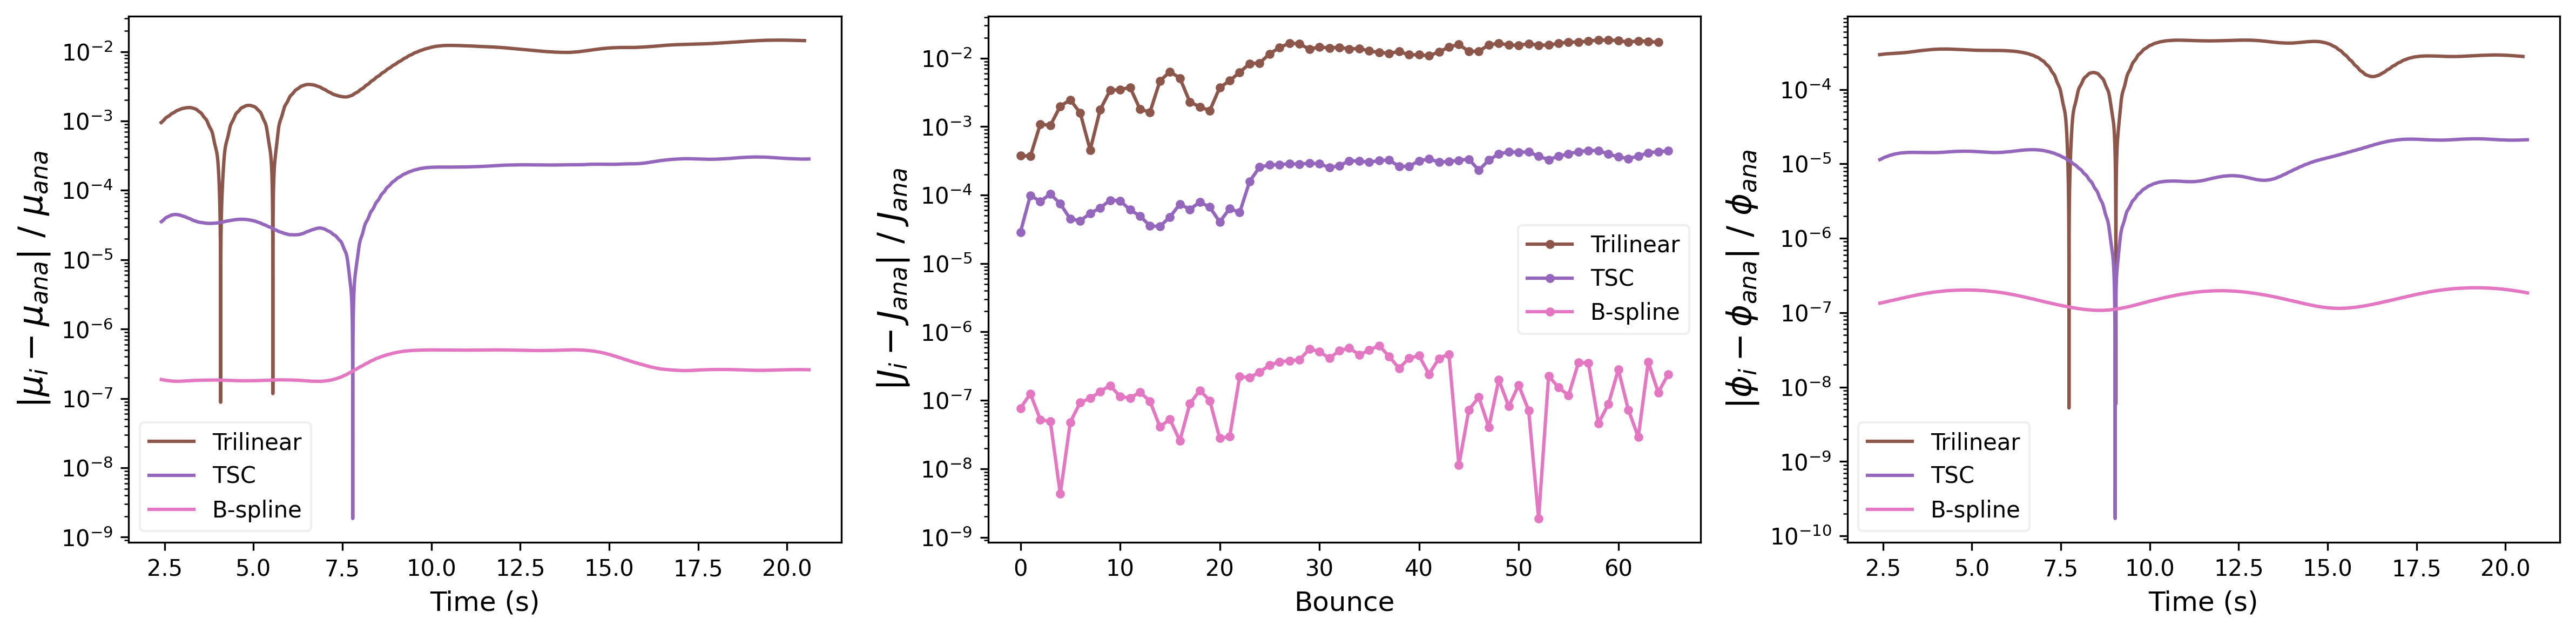

In [54]:
fig = plt.figure(figsize=(16, 4), dpi=300)

# First subplot (mu error)
ax1 = fig.add_subplot(131)  
ax1.plot(time_tri[window_size_el-1:][window_size_el:], erro_mu_tri[1:], '-', label='Trilinear', color=colors[5])
ax1.plot(time_tsc[window_size_el-1:][window_size_el:], erro_mu_tsc[1:], '-', label='TSC', color=colors[4])
ax1.plot(time_bsp[window_size_el-1:][window_size_el:], erro_mu_bsp[1:], '-', label='B-spline', color=colors[6])
ax1.set_ylabel(r'$|\mu_i-\mu_{ana}|$ / $\mu_{ana}$', fontsize=15)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.legend(fontsize=10,framealpha=0.3)
ax1.set_yscale('log')

# Second subplot (J error)
ax2 = fig.add_subplot(132)  
ax2.plot(erro_j_tri[1:], '.-', label='Trilinear', color=colors[5])
ax2.plot(erro_j_tsc[1:], '.-', label='TSC', color=colors[4])
ax2.plot(erro_j_bsp[1:], '.-', label='B-spline', color=colors[6])
ax2.set_ylabel(r'$|J_i-J_{ana}|$ / $J_{ana}$', fontsize=15)
ax2.set_xlabel('Bounce', fontsize=12)
ax2.legend(fontsize=10,framealpha=0.3)
ax2.set_yscale('log')

# Third subplot (Phi)
ax3 = fig.add_subplot(133) 
ax3.plot(time_tri[window_size_el-1:][window_size_el:], erro_phi_tri[1:], '-', label='Trilinear', color=colors[5])
ax3.plot(time_tsc[window_size_el-1:][window_size_el:], erro_phi_tsc[1:], '-', label='TSC', color=colors[4])
ax3.plot(time_bsp[window_size_el-1:][window_size_el:], erro_phi_bsp[1:], '-', label='B-spline', color=colors[6])
ax3.set_ylabel(r'$|\phi_i-\phi_{ana}|$ / $\phi_{ana}$', fontsize=15)
ax3.set_xlabel('Time (s)', fontsize=12)
ax3.legend(fontsize=10,framealpha=0.3)
ax3.set_yscale('log')

plt.tight_layout()
plt.show()
